In [12]:
import numpy as np

class AdalineSGD(object):
    """自适应线性神经元分类器,支持在线学习"""

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        #设置random_state随机数种子使每次随机后的结果都相同
        self.random_state = random_state

    def fit(self, X, Y):
        """训练数据"""
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X,Y = self._shuffle(X,Y)
            cost = []
            for xi,target in zip(X,Y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost) / len(Y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, Y):
        """不重新初始化权重来更新数据"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if Y.ravel().shape[0] > 1:
            for xi,target in zip(X,Y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,Y)
        return self

    def _shuffle(self, X, Y):
        """对训练数据洗牌"""
        #产生范围从0到100的独立数字的随机序列
        r = self.rgen.permutation(len(Y))
        return X[r],Y[r]

    def _initialize_weights(self,m):
        """初始化权重"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """利用自适应规则更新权重"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/柠檬有点萌/Desktop/machine_learning/iris.data',header=None)
#列出最后五行数据，确保数据正确
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
import matplotlib.pyplot as plt

Y = df.iloc[0:100,4].values
Y = np.where(Y=='Iris-setosa',-1,1)
X = df.iloc[0:100,[0,2]].values

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,Y,classifier,resolution=0.02):
    #定义颜色和标记，创建色度图
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    #画出目标界面
    x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1  #横坐标最大值和最小值
    x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1  #纵坐标最大值和最小值
    #绘制网格图，利用矩阵
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    #ravel函数将矩阵变为一维数组
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #填充等高线
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(Y)):
        #X,Y均为矩阵，把点画出来
        plt.scatter(x=X[Y == cl,0] , y=X[Y == cl,1] , alpha = 0.8 , c = colors[idx] , marker = markers[idx] , label = cl , edgecolor = 'black')


In [6]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

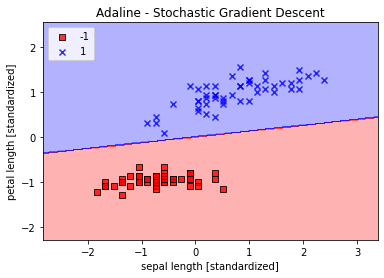

In [13]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, Y)

plot_decision_regions(X_std, Y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

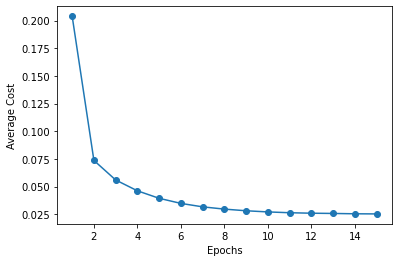

In [23]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()